# SQL books app

`Цель исследования`: проанализировать базу данных крупного сервиса для чтения книг по подписке для формирования корректного ценностного предложения.    

`Входные данные`: база данных с информацией о книгах, издательствах, авторах, а также пользовательских обзорах книг.     

<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подключение-к-БД" data-toc-modified-id="Подключение-к-БД-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подключение к БД</a></span></li><li><span><a href="#Исследование-БД" data-toc-modified-id="Исследование-БД-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование БД</a></span></li><li><span><a href="#SQL-запросы-к-БД" data-toc-modified-id="SQL-запросы-к-БД-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>SQL запросы к БД</a></span><ul class="toc-item"><li><span><a href="#Запрос-1" data-toc-modified-id="Запрос-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Запрос 1</a></span></li><li><span><a href="#Запрос-2" data-toc-modified-id="Запрос-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Запрос 2</a></span></li><li><span><a href="#Запрос-3" data-toc-modified-id="Запрос-3-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Запрос 3</a></span></li><li><span><a href="#Запрос-4" data-toc-modified-id="Запрос-4-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Запрос 4</a></span></li><li><span><a href="#Запрос-5" data-toc-modified-id="Запрос-5-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Запрос 5</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Подключение к БД

In [1]:
import pandas  as pd
from sqlalchemy import create_engine

In [2]:
db_config = {'user': 'xxx', 
             'pwd': 'xxx', 
             'host': 'xxx',
             'port': 6666, 
             'db': 'xxx'} 
con_str = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])
engine = create_engine(con_str, connect_args={'sslmode':'require'})

Уберем прокрутку вывода результатов ячейки

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Исследование БД

Ознакомимся со схемой данных

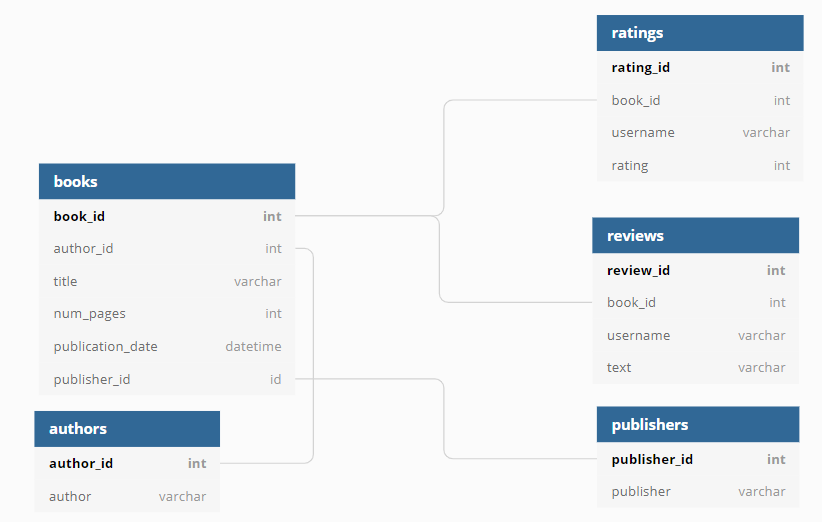

В БД 5 таблиц, таблица books содержит ключи к остальным 4 таблицам: с авторами, издательствами, рейтингами и обзорами.

Исследуем таблицы

In [4]:
def queryDB(sql_query):
     return pd.io.sql.read_sql(sql_query, con = engine) 

In [5]:
tables = ['books', 'authors', 'publishers', 'ratings', 'reviews']
for table in tables:
    sql_query = """
                SELECT *
                FROM 
                """ + table
    pd_table = queryDB(sql_query)
    print('Таблица ' + table)
    print()
    print(pd_table.info())
    display(pd_table.head())
    print('-------------------------')
    print()

Таблица books

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


-------------------------

Таблица authors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
None


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


-------------------------

Таблица publishers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
None


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


-------------------------

Таблица ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
None


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


-------------------------

Таблица reviews

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
None


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


-------------------------



База данных содержит данные о 1000 книгах, написанных 636 авторами и изданными 340 издательствами, а также данные о 6456 пользовательских рейтингах и 2793 пользовательских обзорах.

## SQL запросы к БД

### Запрос 1

- Количество книг, вышедших после 1 января 2000 года

In [6]:
sql_query1 = """
SELECT 
    COUNT(*) AS n_books
FROM 
    books 
WHERE 
    publication_date > '01.01.2000'
"""
display(queryDB(sql_query1))

,n_books
0,819


В БД большая доля современных книг из 21 века.

### Запрос 2

- Количество обзоров и средняя оценка для каждой книги

In [7]:
sql_query2 = """
SELECT 
    books.title AS book_title,
    COUNT(reviews.review_id) AS n_reviews,
    AVG(ratings.rating) AS avg_rating
FROM 
    books
    INNER JOIN reviews
    ON reviews.book_id = books.book_id
    INNER JOIN ratings
    ON ratings.book_id = books.book_id
GROUP BY 
    books.title
"""
display(queryDB(sql_query2))

,book_title,n_reviews,avg_rating
0,The Count of Monte Cristo,115,4.217391
1,Count Zero (Sprawl #2),4,2.500000
2,The Botany of Desire: A Plant's-Eye View of th...,4,3.500000
3,The Poisonwood Bible,110,4.363636
4,The Canterbury Tales,18,3.333333
...,...,...,...
988,Of Love and Other Demons,4,4.500000
989,In the Heart of the Sea: The Tragedy of the Wh...,9,3.333333
990,Welcome to Temptation (Dempseys #1),4,5.000000
991,World's End (The Sandman #8),4,4.500000


В БД есть как популярные книги с большим количеством обзоров и высоким рейтингом, так и непопулярные с малым количеством обзоров и низким рейтингом.

### Запрос 3

- Издательство, которое выпустило наибольшее число книг толще 50 страниц 

In [8]:
sql_query3 = """
SELECT
    publishers_n_books1.publisher
FROM
    (SELECT 
        publishers.publisher,
        COUNT(books.book_id) AS n_books
    FROM 
        publishers 
        INNER JOIN books ON books.publisher_id = publishers.publisher_id
    WHERE 
        books.num_pages > 50
    GROUP BY
        publishers.publisher) AS publishers_n_books1 
WHERE
    publishers_n_books1.n_books = (SELECT
                                        MAX(publishers_n_books.n_books)
                                    FROM (SELECT 
                                        publisher_id,
                                        COUNT(book_id) AS n_books
                                    FROM 
                                        books 
                                    WHERE 
                                        num_pages >= 50
                                    GROUP BY 
                                        publisher_id) AS publishers_n_books)    

"""
display(queryDB(sql_query3))

,publisher
0,Penguin Books


Издательство, выпустившее наибольшее количество книг,предстваленных в БД, - Penguin Books.

### Запрос 4

- Автор с самой высокой средней оценкой книг (среди книг с 50 и более оценками)

In [10]:
sql_query4_1 = """
WITH TEMP AS 
(SELECT *
FROM 
    authors
    INNER JOIN (SELECT
                    books.author_id,
                    AVG(ratings.rating) AS avg_rating
                FROM
                    ratings
                    INNER JOIN books 
                    ON books.book_id = ratings.book_id
                WHERE
                    books.book_id IN (SELECT
                                            ratings.book_id
                                        FROM
                                            ratings
                                        GROUP BY 
                                            ratings.book_id
                                        HAVING
                                            COUNT(ratings.rating_id) >= 50)
                GROUP BY 
                    books.author_id) AS author_avg_rating
    ON author_avg_rating.author_id = authors.author_id
    )

SELECT author FROM TEMP
WHERE avg_rating = (SELECT MAX(avg_rating) FROM TEMP)
"""
display(queryDB(sql_query4_1))

,author
0,J.K. Rowling/Mary GrandPré


Автор с самой высокой оценкой книг в БД - J.K. Rowling/Mary GrandPré.

### Запрос 5

- Среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [11]:
sql_query5 = """
SELECT
    AVG(user_n_reviews.n_reviews) AS avg_n_reviews
FROM (SELECT
        username,
        COUNT(review_id) AS n_reviews
    FROM reviews
    GROUP BY 
        username) AS user_n_reviews
WHERE 
    user_n_reviews.username IN 
                            (SELECT 
                                username
                            FROM 
                                ratings
                            GROUP BY
                                username
                            HAVING
                                COUNT(rating_id) > 50)
        
"""
display(queryDB(sql_query5))

,avg_n_reviews
0,24.333333


Пользователи, которые поставили больше 50 оценок, в среднем составили 24.33 обзора.

## Выводы

В сервисе преставлена относительно современная литература - большая часть книг издана в 21 веке. Присутствуют как популярные книги с большим количеством обзоров и высоким рейтингом, так и непопулярные с малым количеством обзоров и низким рейтингом. Наиболее активные пользователя в среднем составляют 24.33 обзора. Наибольшая доля среди издательств принадлежит Penguin Books. Самый высокооцененный автор, представленный в сервисе - J.K. Rowling/Mary GrandPré. 